In [1]:
print("oi")

oi


In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as plt

In [2]:
df = pd.read_csv("Base_Melodia.csv")
df.head(5)

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,...,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.0,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,...,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.0,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,...,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.0,0.0,7GXP5OhYyPVLmcVfO9Iqin
3,"Sinatra, Frank",Frank Sinatra,Songs for Swingin' Lovers!,306.0,308.0,NaN,-195,1956,Big Band/Jazz,Studio,...,2,62.0,spotify:album:4kca7vXd1Wo5GE2DMafvMc,1.0,Male,1915.0,1946.0,41.0,10.0,4kca7vXd1Wo5GE2DMafvMc
4,Little Richard,Little Richard,Here's Little Richard,50.0,50.0,227.0,-177,1957,NaN,Studio,...,13,64.0,spotify:album:18tV6PLXYvVjsdOVk0S7M8,1.0,Male,1932.0,1957.0,25.0,0.0,18tV6PLXYvVjsdOVk0S7M8


In [9]:
print(df["genre"].unique())

['Big Band/Jazz' "Rock n' Roll/Rhythm & Blues" nan 'Soul/Gospel/R&B'
 'Hip-Hop/Rap' 'Blues/Blues Rock' 'Country/Folk/Country Rock/Folk Rock'
 'Indie/Alternative Rock' 'Punk/Post-Punk/New Wave/Power Pop' 'Electronic'
 'Funk/Disco' 'Latin' 'Hard Rock/Metal' 'Singer-Songwriter/Heartland Rock'
 'Blues/Blues ROck' 'Reggae' 'Afrobeat']


In [3]:
pd.set_option('display.max_columns', None)

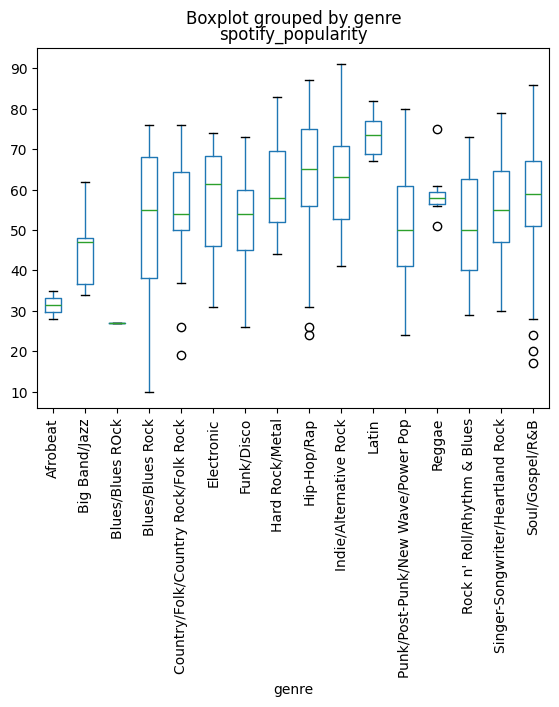

In [19]:

box = df.boxplot(column='spotify_popularity', by='genre', grid=False, rot=90)